In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [2]:
df=pd.read_csv('data.csv')

In [3]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-03-01,19.577499,19.578930,19.241785,19.445356,16.527443,683270000
1,2012-03-02,19.437143,19.528570,19.375713,19.470715,16.548992,431712400
2,2012-03-05,19.479286,19.552856,18.785713,19.041430,16.184122,809124400
3,2012-03-06,18.702143,19.060356,18.436428,18.937857,16.096092,810238800
4,2012-03-07,19.171429,19.206429,18.689285,18.953215,16.109144,798520800
...,...,...,...,...,...,...,...
2589,2022-06-14,133.130005,133.889999,131.479996,132.759995,131.971970,84784300
2590,2022-06-15,134.289993,137.339996,132.160004,135.429993,134.626114,91533000
2591,2022-06-16,132.080002,132.389999,129.039993,130.059998,129.287979,108123900
2592,2022-06-17,130.070007,133.080002,129.809998,131.559998,130.779083,134520300


In [4]:
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-03-01,19.577499,19.578930,19.241785,19.445356,16.527443,683270000
1,2012-03-02,19.437143,19.528570,19.375713,19.470715,16.548992,431712400
2,2012-03-05,19.479286,19.552856,18.785713,19.041430,16.184122,809124400
3,2012-03-06,18.702143,19.060356,18.436428,18.937857,16.096092,810238800
4,2012-03-07,19.171429,19.206429,18.689285,18.953215,16.109144,798520800


In [5]:
df.tail(5)

,Date,Open,High,Low,Close,Adj Close,Volume
2589,2022-06-14,133.130005,133.889999,131.479996,132.759995,131.971970,84784300
2590,2022-06-15,134.289993,137.339996,132.160004,135.429993,134.626114,91533000
2591,2022-06-16,132.080002,132.389999,129.039993,130.059998,129.287979,108123900
2592,2022-06-17,130.070007,133.080002,129.809998,131.559998,130.779083,134520300
2593,2022-06-21,133.419998,137.059998,133.320007,135.869995,135.063492,81000500


In [6]:
df.shape

(2594, 7)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2594 entries, 0 to 2593
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2594 non-null   object 
 1   Open       2594 non-null   float64
 2   High       2594 non-null   float64
 3   Low        2594 non-null   float64
 4   Close      2594 non-null   float64
 5   Adj Close  2594 non-null   float64
 6   Volume     2594 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 142.0+ KB


In [8]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

#df.info()

In [9]:
df = df.dropna(subset=['Date'])

In [10]:
df.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,2594,2594.000000,2594.000000,2594.000000,2594.000000,2594.000000,2.594000e+03
mean,2017-04-26 04:14:14.895913472,54.573919,55.169814,53.986552,54.598382,52.478962,2.059973e+08
min,2012-03-01 00:00:00,13.856071,14.271429,13.753571,13.947500,12.029553,4.100000e+07
25%,2014-09-29 06:00:00,24.118750,24.333125,23.903125,24.136073,21.845253,9.906485e+07
50%,2017-04-26 12:00:00,35.938750,36.127500,35.782501,35.928749,33.732573,1.433088e+08
75%,2019-11-20 18:00:00,62.715623,64.526251,62.217501,63.669999,62.276530,2.508434e+08
max,2022-06-21 00:00:00,182.630005,182.940002,179.119995,182.009995,180.434296,1.460852e+09
std,NaN,44.494624,45.063258,43.934519,44.519246,44.870330,1.691014e+08


In [11]:
missing_data=df.isnull().sum()
missing_data

,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


In [12]:
for column in missing_data.index:
    print(column)
    print(missing_data[column])  # just print the count
    print(" ")


Date
0
 
Open
0
 
High
0
 
Low
0
 
Close
0
 
Adj Close
0
 
Volume
0
 


In [13]:
df.duplicated().sum()

np.int64(0)

<ipython-input-14-da0206a5878c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar = sns.barplot(x=yearly_avg_open.index, y=yearly_avg_open.values, palette='viridis')
<ipython-input-14-da0206a5878c>:11: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


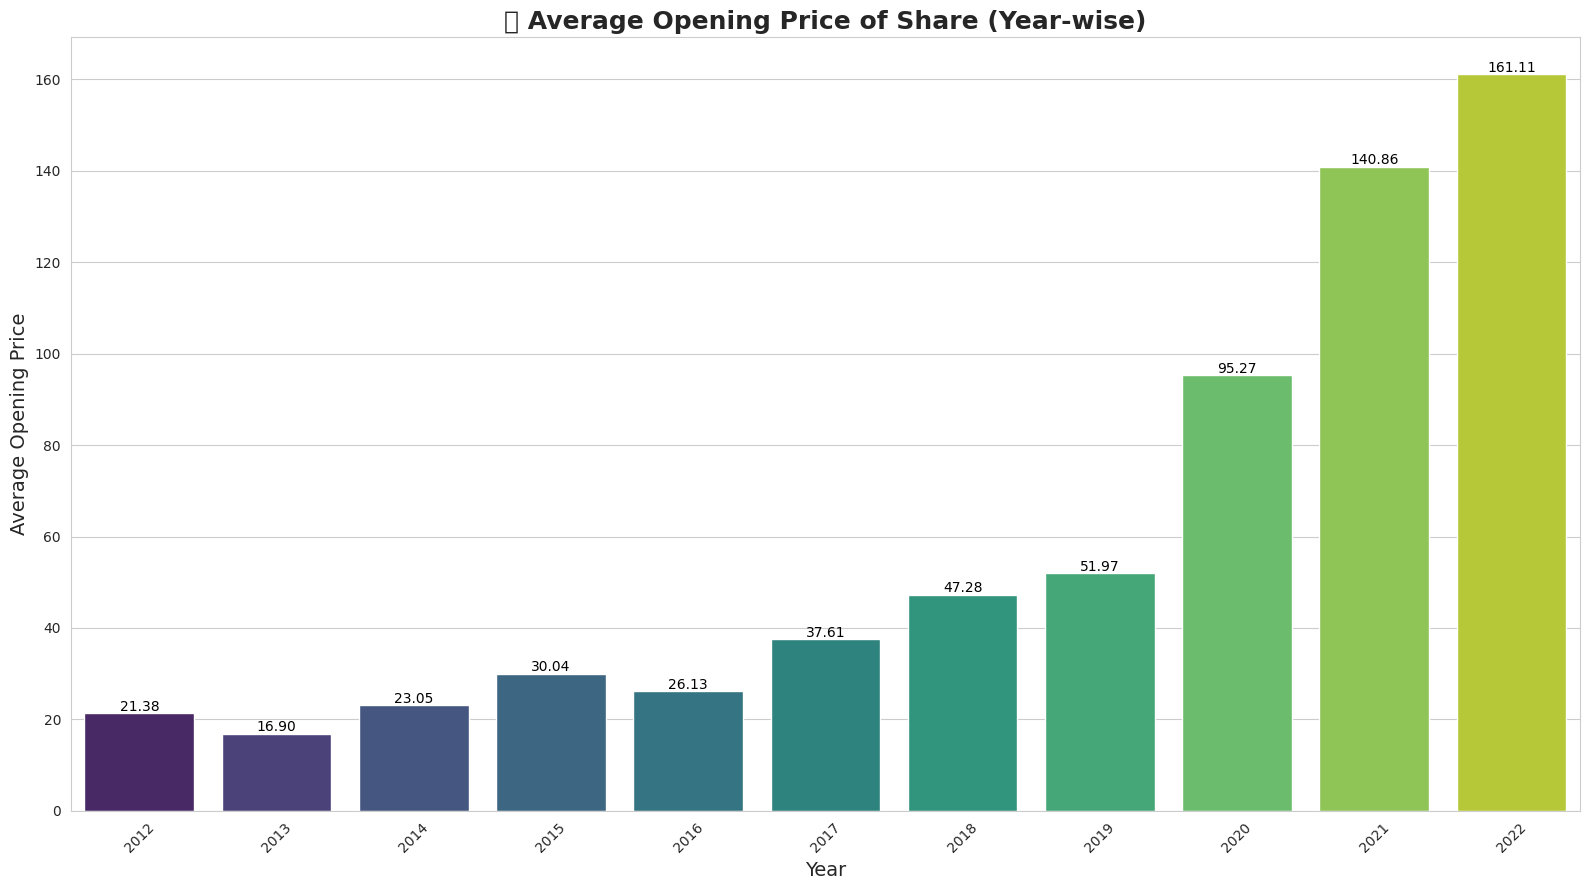

In [14]:
yearly_avg_open = df.groupby(df['Date'].dt.year)['Open'].mean()
sns.set_style("whitegrid")
plt.figure(figsize=(16, 9))
bar = sns.barplot(x=yearly_avg_open.index, y=yearly_avg_open.values, palette='viridis')
for index, value in enumerate(yearly_avg_open.values):
    plt.text(index, value + 0.5, f'{value:.2f}', ha='center', fontsize=10, color='black')
plt.title('📈 Average Opening Price of Share (Year-wise)', fontsize=18, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Opening Price', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


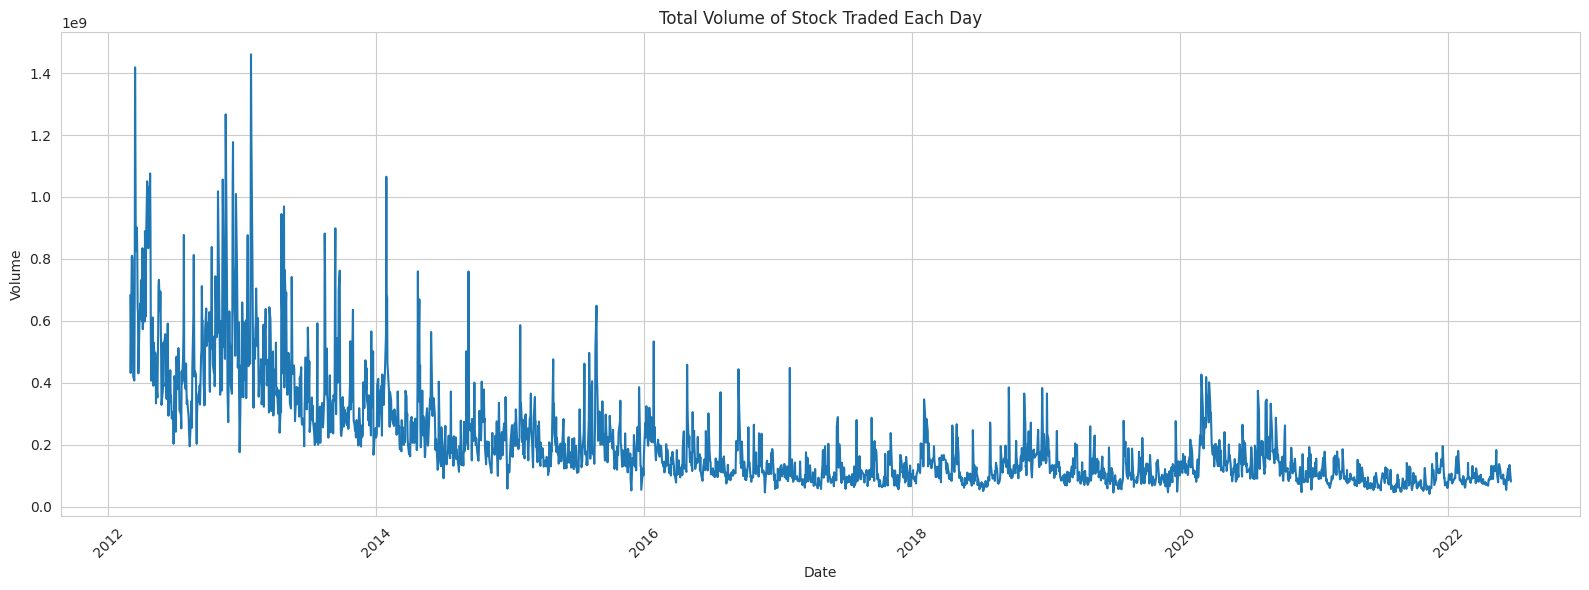

In [15]:
# prompt: ## Now let's plot the total volume of stock being traded each day

import matplotlib.pyplot as plt
plt.figure(figsize=(16, 6))
plt.plot(df['Date'], df['Volume'])
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Total Volume of Stock Traded Each Day')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<ipython-input-16-5badf706d78b>:11: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


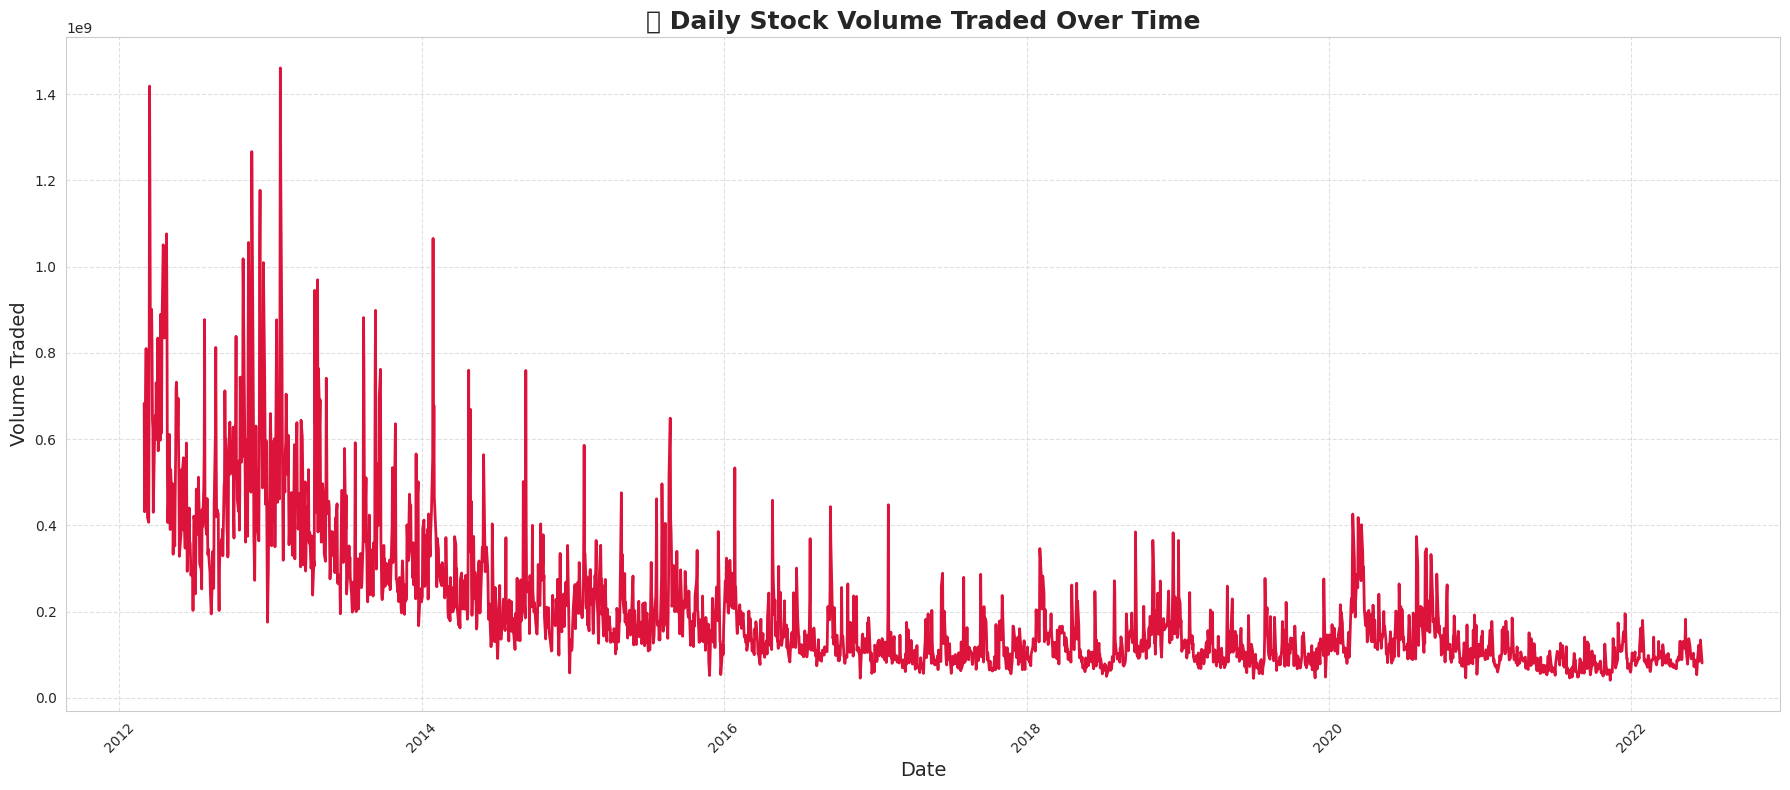

In [16]:
## Now let's plot the total volume of stock being traded each day
df = df.sort_values(by='Date')
plt.figure(figsize=(18, 8))
sns.lineplot(x='Date', y='Volume', data=df, color='crimson', linewidth=2)

plt.title('📊 Daily Stock Volume Traded Over Time', fontsize=18, fontweight='bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Volume Traded', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

<ipython-input-17-90beff49bf91>:14: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


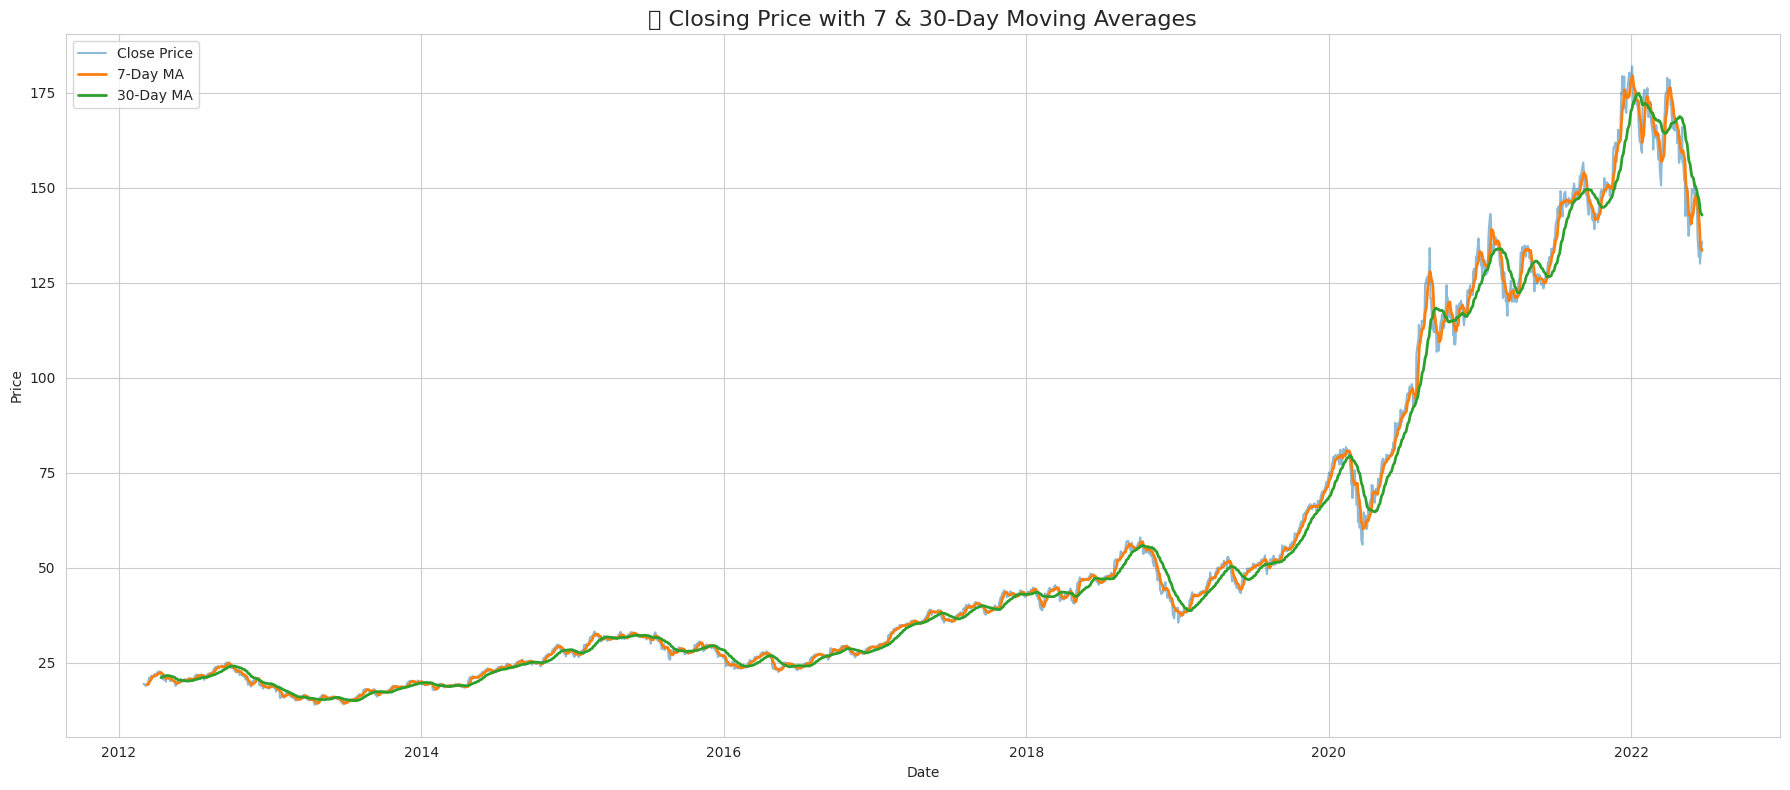

In [17]:
# What was the moving average of the various stocks?
df['MA_7']=df['Close'].rolling(window=7).mean()
df['MA_30']=df['Close'].rolling(window=30).mean()
plt.figure(figsize=(18, 8))
plt.plot(df['Date'], df['Close'], label='Close Price', alpha=0.5)
plt.plot(df['Date'], df['MA_7'], label='7-Day MA', linewidth=2)
plt.plot(df['Date'], df['MA_30'], label='30-Day MA', linewidth=2)

plt.title('📈 Closing Price with 7 & 30-Day Moving Averages', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

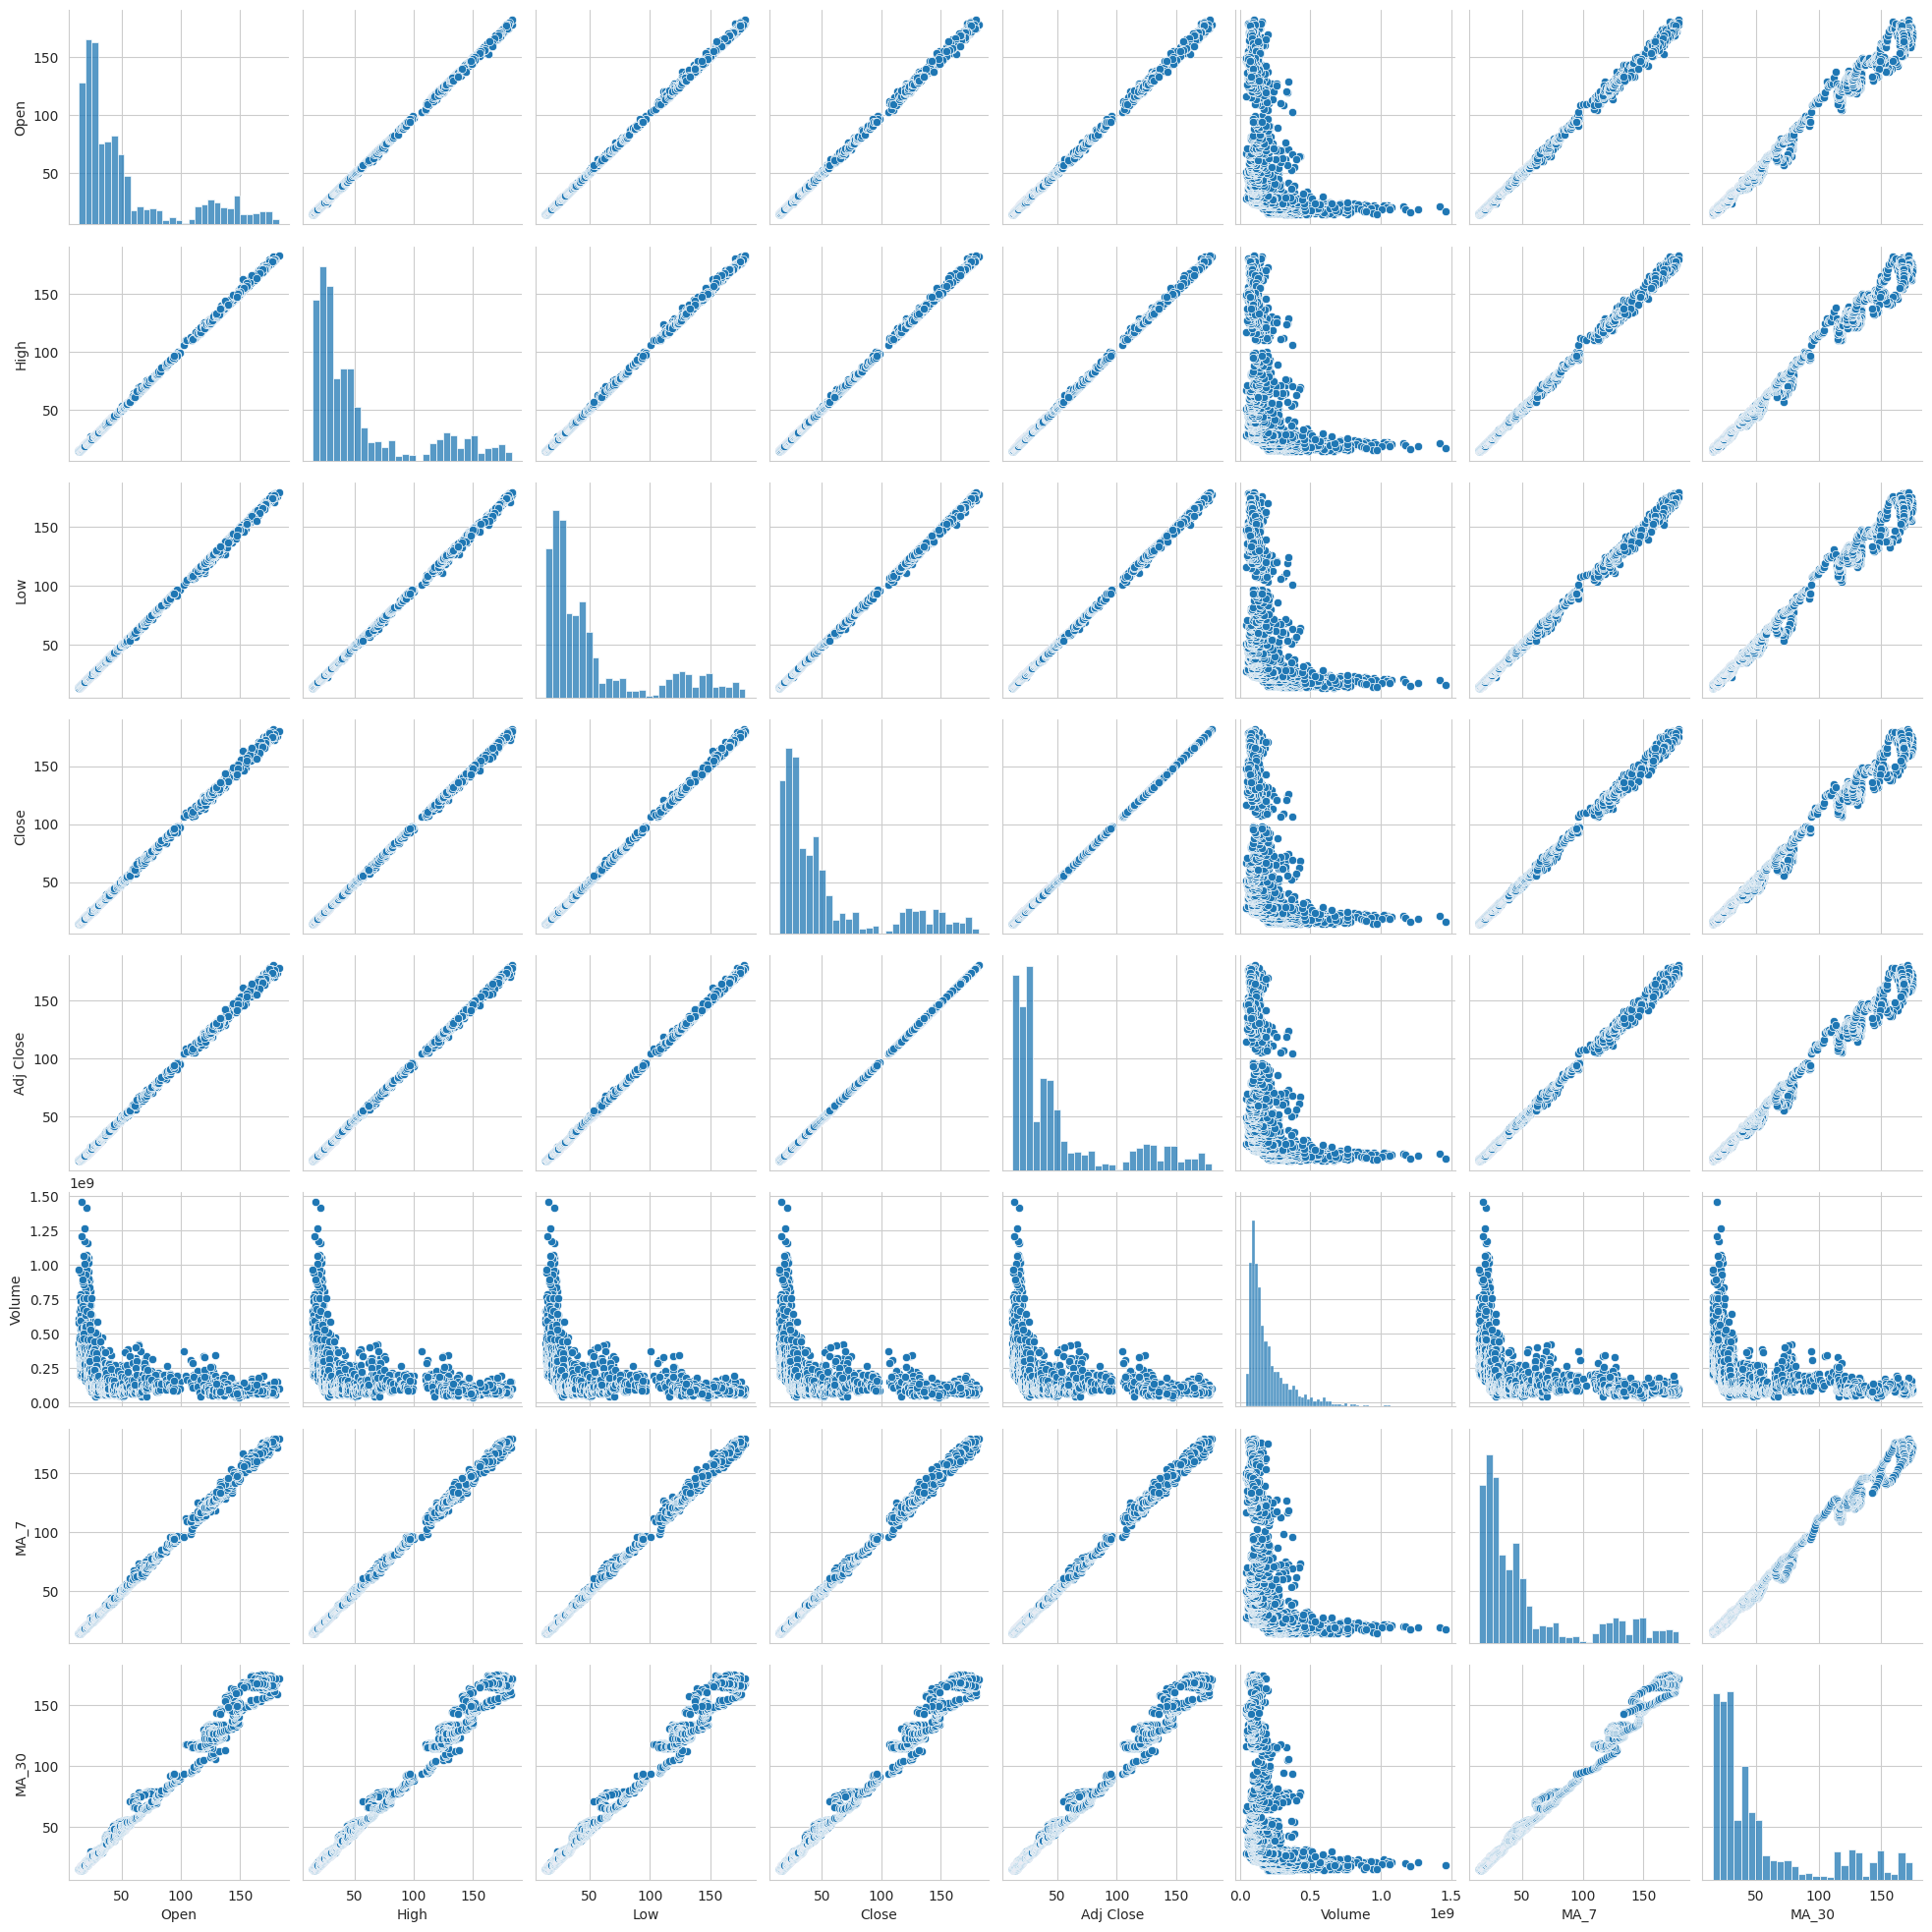

In [18]:
sns.pairplot(df)



In [19]:
data=df.filter(['Close'])
dataset=data.values

In [20]:
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

2465

In [21]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)


In [22]:
scaled_data

array([[0.03271316],
       [0.03286405],
       [0.03030974],
       ...,
       [0.69088881],
       [0.69981407],
       [0.72545927]])

In [23]:
# Create the training data set
# Create the scaled training data set
train_data=scaled_data[0:int(training_data_len),:]
X_train=[]
y_train=[]
for i in range(60,len(train_data)):
    X_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i<= 61:
        print(X_train)
        print(y_train)
        print()

[array([0.03271316, 0.03286405, 0.03030974, 0.02969346, 0.02978484,
       0.03218616, 0.03286193, 0.03431335, 0.03773469, 0.04229932,
       0.04144504, 0.04144717, 0.04474738, 0.04578017, 0.04504489,
       0.04437338, 0.04367423, 0.04599691, 0.04759072, 0.04825799,
       0.04660894, 0.044418  , 0.04847262, 0.0507443 , 0.04967964,
       0.05167084, 0.05221272, 0.0505573 , 0.05008129, 0.04935239,
       0.04562503, 0.04029114, 0.04657494, 0.04628593, 0.04184455,
       0.03877172, 0.0384997 , 0.03607289, 0.04663868, 0.04614992,
       0.04515114, 0.04110928, 0.04071615, 0.04153429, 0.04065027,
       0.03712905, 0.03802795, 0.03775169, 0.03796419, 0.03824894,
       0.0374393 , 0.03563512, 0.03456197, 0.0330553 , 0.02966372,
       0.02971896, 0.03628539, 0.0353695 , 0.03825746, 0.03714393])]
[np.float64(0.036500023399033785)]

[array([0.03271316, 0.03286405, 0.03030974, 0.02969346, 0.02978484,
       0.03218616, 0.03286193, 0.03431335, 0.03773469, 0.04229932,
       0.04144504, 0.0

In [24]:
# Convert the x_train and y_train to numpy arrays
X_train,y_train=np.array(X_train),np.array(y_train)

In [25]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [26]:
X_train

array([[[0.03271316],
        [0.03286405],
        [0.03030974],
        ...,
        [0.0353695 ],
        [0.03825746],
        [0.03714393]],

       [[0.03286405],
        [0.03030974],
        [0.02969346],
        ...,
        [0.03825746],
        [0.03714393],
        [0.03650002]],

       [[0.03030974],
        [0.02969346],
        [0.02978484],
        ...,
        [0.03714393],
        [0.03650002],
        [0.03862083]],

       ...,

       [[0.80233542],
        [0.7860915 ],
        [0.767527  ],
        ...,
        [0.93555967],
        [0.95876538],
        [0.95567127]],

       [[0.7860915 ],
        [0.767527  ],
        [0.77044252],
        ...,
        [0.95876538],
        [0.95567127],
        [0.98476758]],

       [[0.767527  ],
        [0.77044252],
        [0.78484201],
        ...,
        [0.95567127],
        [0.98476758],
        [0.96269251]]])

In [27]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [28]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (X_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [29]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 128)        │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 117,619 (459.45 KB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [31]:
history=model.fit(X_train, y_train, batch_size=64, epochs=20)

Epoch 1/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 9s 140ms/step - loss: 0.0154
Epoch 2/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 178ms/step - loss: 3.2284e-04
Epoch 3/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 178ms/step - loss: 2.2349e-04
Epoch 4/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 9s 146ms/step - loss: 2.0731e-04
Epoch 5/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 193ms/step - loss: 2.2816e-04
Epoch 6/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 196ms/step - loss: 2.3481e-04
Epoch 7/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 9s 150ms/step - loss: 2.6251e-04
Epoch 8/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 141ms/step - loss: 2.4099e-04
Epoch 9/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 182ms/step - loss: 2.4515e-04
Epoch 10/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 167ms/step - loss: 1.9334e-04
Epoch 11/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 150ms/step - loss: 1.6346e-04
Epoch 12/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 149ms/step - loss: 1.7979e-04
Epoch 13/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 147ms/step - loss: 2.1658e-04
Epoch 14/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 11s 167ms/step - loss: 1.6257e-

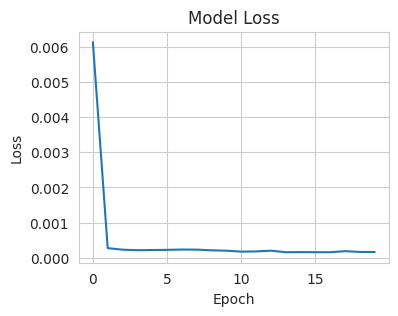

In [34]:
plt.figure(figsize=(4,3))
plt.plot(model.history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()


In [36]:
#create training data set
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


np.float64(7.418315852764298)

In [37]:
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

np.float64(7.418315852764298)

<ipython-input-40-e32c801355ff>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


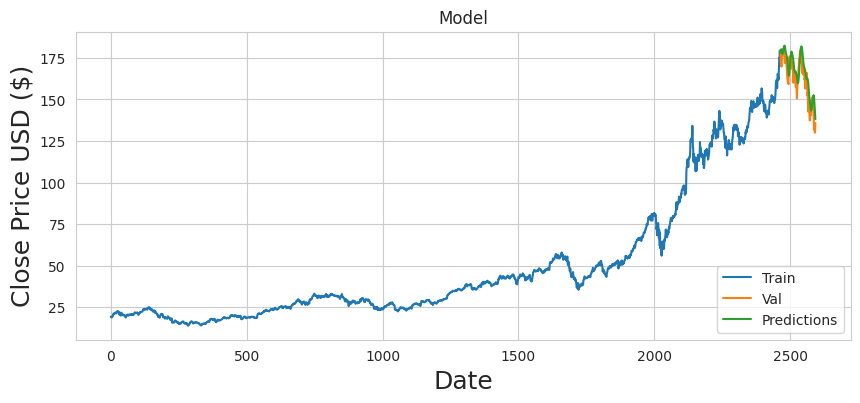

In [40]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(10,4))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()